In [639]:
import pandas as pd

In [640]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [641]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Data

In [642]:
df = pd.read_csv("/content/drive/MyDrive/supermarket_sales_dirty.csv", encoding='utf-8')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761904762,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048,1/27/2019,20:33,Ewallet,465.76,4.761904762,23.288,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,NaN,Ewallet,604.17,4.761904762,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,NaN,40.35,4.761904762,2.0175,6.2
996,NaN,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.49,3/2/2019,17:16,NaN,973.80,4.761904762,48.69,4.4
997,NaN,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.432,2/9/2019,13:22,NaN,31.84,4.761904762,1.592,7.7
998,NaN,A,Yangon,Normal,Male,Home and lifestyle,NaN,1,3.2910,69.111,2/22/2019,15:33,NaN,65.82,4.761904762,3.291,4.1


In [643]:
df.shape

(1000, 17)

In [777]:
df.dtypes

City                object
Customer            object
Gender              object
Product             object
Unit               float64
Quantity           float64
Tax                float64
Total              float64
Payment             object
cogs               float64
gmp                float64
income              object
Rating             float64
Year        datetime64[ns]
Month       datetime64[ns]
Day         datetime64[ns]
Time        datetime64[ns]
dtype: object

# Handling Missing values

City        0
Customer    0
Gender      0
Product     0
Unit        0
Quantity    0
Tax         0
Total       0
Payment     0
cogs        0
gmp         0
income      0
Rating      0
Year        0
Month       0
Day         0
Time        0
dtype: int64


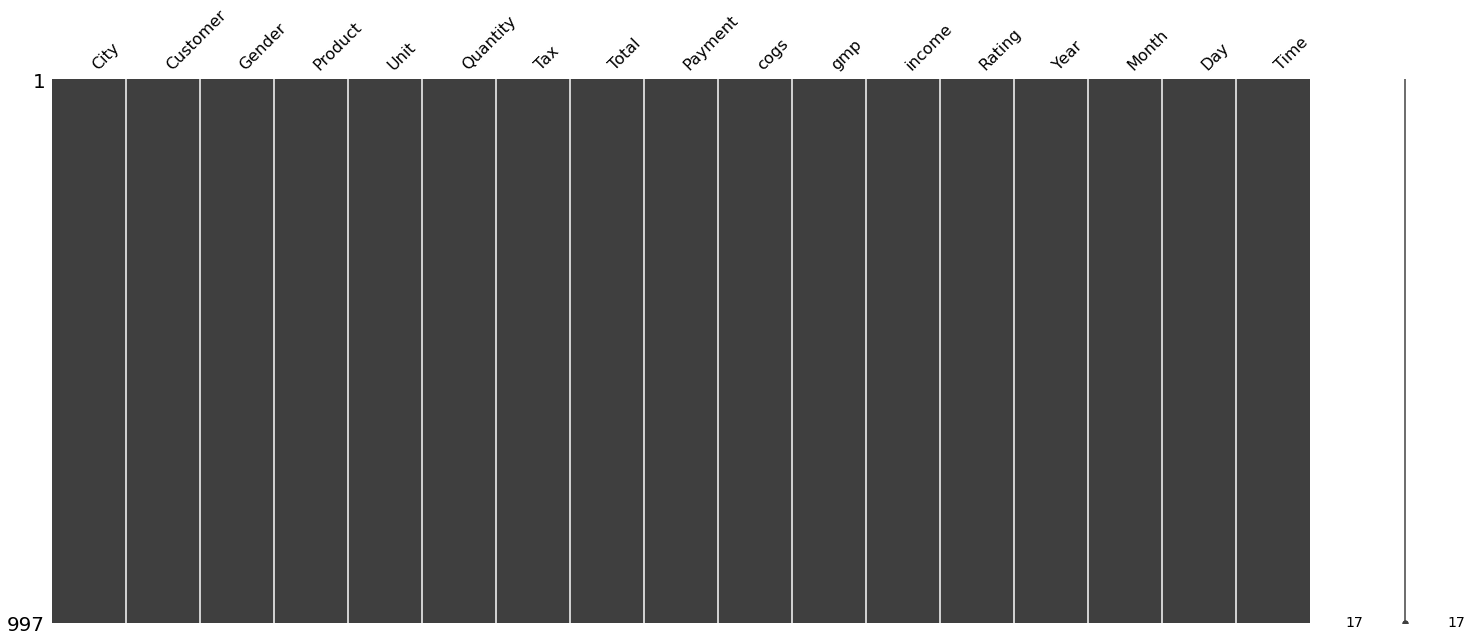

In [775]:
def showing_missing_values_for_columns(df):
    print(df.isna().sum())
    msno.matrix(df)
showing_missing_values_for_columns(df)

In [776]:
def show_missing_values_for_rows(column):
    return df[df[column].isna()]

In [647]:
show_missing_values_for_rows('Branch')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
423,301-81-8610,NaN,Mandalay,Member,Male,Fashion accessories,25.42,8,10.1680,213.528,3/19/2019,19:42,Credit card,203.36,4.761904762,10.168,6.7
424,489-64-4354,NaN,Naypyitaw,Normal,Male,Fashion accessories,16.28,1,0.8140,17.094,3/9/2019,15:36,Cash,16.28,4.761904762,0.814,5.0
425,198-84-7132,NaN,Mandalay,Member,Male,Fashion accessories,40.61,9,18.2745,383.7645,1/2/2019,13:40,Cash,365.49,4.761904762,18.2745,7.0
426,269-10-8440,NaN,Yangon,Member,Male,Health and beauty,53.17,7,18.6095,390.7995,1/21/2019,18:01,Cash,372.19,4.761904762,18.6095,8.9
563,760-90-2357,NaN,Yangon,Member,Male,Electronic accessories,74.51,6,22.3530,469.413,3/20/2019,15:08,Ewallet,447.06,4.761904762,22.353,5.0
564,514-37-2845,NaN,Mandalay,Normal,Male,Fashion accessories,99.25,2,9.9250,208.425,3/20/2019,13:02,Cash,198.50,4.761904762,9.925,9.0
565,698-98-5964,NaN,Yangon,Normal,Female,Food and beverages,81.21,10,40.6050,852.705,1/17/2019,13:01,Credit card,812.10,4.761904762,40.605,6.3
566,718-57-9773,NaN,Naypyitaw,Normal,Female,Sports and travel,49.33,10,24.6650,517.965,2/3/2019,16:40,Credit card,493.30,4.761904762,24.665,9.4
759,156-95-3964,NaN,Yangon,Normal,Female,Food and beverages,55.39,4,11.0780,232.638,3/25/2019,15:19,Ewallet,221.56,4.761904762,11.078,8.0
760,842-40-8179,NaN,Mandalay,Member,Female,Food and beverages,77.20,10,38.6000,810.6,2/11/2019,10:38,Credit card,772.00,4.761904762,38.6,5.6


In [650]:
show_missing_values_for_rows('Unit price')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,NaN,2,3.6260,76.146,1/10/2019,NaN,Credit card,72.52,NaN,3.626,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,NaN,3,8.2260,172.746,2/20/2019,NaN,Credit card,164.52,4.761904762,8.226,5.9
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,NaN,10,18.4900,388.29,1/1/2019,19:48,Credit card,369.80,4.761904762,18.49,7.0
485,438-01-4015,B,Mandalay,Member,Female,Sports and travel,NaN,4,9.8980,207.858,3/21/2019,15:25,Ewallet,197.96,4.761904762,9.898,6.6
979,NaN,B,Mandalay,Normal,Female,Food and beverages,NaN,1,3.3885,71.1585,2/4/2019,NaN,Credit card,67.77,4.761904762,3.3885,6.5
980,NaN,C,Naypyitaw,Member,Male,Food and beverages,NaN,4,11.9180,250.278,1/19/2019,NaN,Cash,238.36,4.761904762,11.918,9.8
998,NaN,A,Yangon,Normal,Male,Home and lifestyle,NaN,1,3.2910,69.111,2/22/2019,15:33,NaN,65.82,4.761904762,3.291,4.1
999,NaN,A,Yangon,Member,Female,Fashion accessories,NaN,7,30.9190,649.299,2//2019,13:28,NaN,618.38,4.761904762,30.919,6.6


In [651]:
show_missing_values_for_rows('Total')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
394,885-17-6250,A,Yangon,Normal,Female,Health and beauty,79.74,1,3.9870,NaN,3/6/2019,10:36,Ewallet,79.74,4.761904762,3.987,7.3
395,726-27-2396,A,Yangon,Normal,Female,Health and beauty,77.50,5,19.3750,NaN,1/24/2019,20:36,Ewallet,387.50,4.761904762,19.375,4.3
396,316-01-3952,A,Yangon,Normal,Female,Food and beverages,54.27,5,13.5675,NaN,3/13/2019,14:16,Ewallet,271.35,4.761904762,13.5675,4.6


In [652]:
show_missing_values_for_rows('Quantity')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
57,635-40-6220,A,Yangon,Normal,Male,Health and beauty,89.60,NaN,35.840,752.64,2/7/2019,11:28,Ewallet,716.80,NaN,35.84,6.6
58,817-48-8732,A,Yangon,Member,Female,Home and lifestyle,72.35,NaN,36.175,759.675,1/20/2019,15:55,Cash,723.50,NaN,36.175,NaN
59,120-06-4233,C,Naypyitaw,Normal,Male,Electronic accessories,30.61,NaN,9.183,192.843,3/12/2019,20:36,Cash,183.66,NaN,9.183,NaN
60,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,NaN,3.711,77.931,2/15/2019,17:47,Credit card,74.22,NaN,3.711,NaN


In [653]:
unit_price = df[df['Unit price'].isnull()].index.tolist()
print(unit_price)

[8, 9, 484, 485, 979, 980, 998, 999]


In [656]:
df["Quantity"] = pd.to_numeric(df.Quantity, errors='coerce')
df["Total"] = pd.to_numeric(df.Total, errors='coerce')

### Handling Missing values for Unit price

In [657]:
# We will subtract tax from total and will divide by quantity and impute the values to null places
for index in unit_price:
    df.loc[index,'Unit price'] = ((df.loc[index,'Total']-df.loc[index,'Tax 5%'])/(df.loc[index, 'Quantity']))

In [658]:
df.iloc[unit_price]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2.0,3.6260,76.1460,1/10/2019,NaN,Credit card,72.52,NaN,3.626,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3.0,8.2260,172.7460,2/20/2019,NaN,Credit card,164.52,4.761904762,8.226,5.9
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10.0,18.4900,388.2900,1/1/2019,19:48,Credit card,369.80,4.761904762,18.49,7.0
485,438-01-4015,B,Mandalay,Member,Female,Sports and travel,49.49,4.0,9.8980,207.8580,3/21/2019,15:25,Ewallet,197.96,4.761904762,9.898,6.6
979,NaN,B,Mandalay,Normal,Female,Food and beverages,67.77,1.0,3.3885,71.1585,2/4/2019,NaN,Credit card,67.77,4.761904762,3.3885,6.5
980,NaN,C,Naypyitaw,Member,Male,Food and beverages,59.59,4.0,11.9180,250.2780,1/19/2019,NaN,Cash,238.36,4.761904762,11.918,9.8
998,NaN,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,15:33,NaN,65.82,4.761904762,3.291,4.1
999,NaN,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,2//2019,13:28,NaN,618.38,4.761904762,30.919,6.6


### Handling Missing values for Total column

In [659]:
# We will impute values for total column by multiplying quantity to unit price and then adding with tax
total = df[df['Total'].isnull()].index.tolist()
print(total)

[306, 391, 394, 395, 396, 412, 433, 518]


In [660]:
for index in total:
    df.loc[index,'Total'] = ((df.loc[index,'Unit price']*df.loc[index,'Quantity'])+(df.loc[index, 'Tax 5%']))

In [661]:
df.iloc[total]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
306,286-01-5402,A,Yangon,Normal,Female,Sports and travel,40.23,7.0,14.0805,295.6905,3/30/2019,13:22,Cash,281.61,4.761904762,14.0805,9.6
391,173-82-9529,B,Mandalay,Normal,Female,Fashion accessories,37.95,10.0,18.9750,398.4750,/26/2019,14:51,Cash,379.50,4.761904762,18.975,9.7
394,885-17-6250,A,Yangon,Normal,Female,Health and beauty,79.74,1.0,3.9870,83.7270,3/6/2019,10:36,Ewallet,79.74,4.761904762,3.987,7.3
395,726-27-2396,A,Yangon,Normal,Female,Health and beauty,77.50,5.0,19.3750,406.8750,1/24/2019,20:36,Ewallet,387.50,4.761904762,19.375,4.3
396,316-01-3952,A,Yangon,Normal,Female,Food and beverages,54.27,5.0,13.5675,284.9175,3/13/2019,14:16,Ewallet,271.35,4.761904762,13.5675,4.6
412,132-23-6451,A,Yangon,Member,Male,Health and beauty,20.97,5.0,5.2425,110.0925,1/4/2019,13:21,Cash,104.85,4.761904762,5.2425,7.8
433,616-87-0016,B,Mandalay,Normal,Male,Fashion accessories,95.54,7.0,33.4390,702.2190,3/9/2019,14:36,Credit card,668.78,4.761904762,33.439,9.6
518,220-28-1851,A,Yangon,Normal,Male,Home and lifestyle,34.73,2.0,3.4730,72.9330,3/1/2019,18:14,Ewallet,69.46,4.761904762,3.473,9.7


### Handling Missing values for Qunatity column

In [662]:
# We will impute quantity column by subtracting total from tax and dividing by unit price
quantity = df[df['Quantity'].isnull()].index.tolist()
print(quantity)

[57, 58, 59, 60, 223, 244, 357, 381]


In [663]:
for index in quantity:
    df.loc[index,'Quantity'] = ((df.loc[index,'Total']-df.loc[index,'Tax 5%'])/(df.loc[index, 'Unit price']))

In [664]:
df.iloc[quantity]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
57,635-40-6220,A,Yangon,Normal,Male,Health and beauty,89.60,8.0,35.840,752.640,2/7/2019,11:28,Ewallet,716.80,NaN,35.84,6.6
58,817-48-8732,A,Yangon,Member,Female,Home and lifestyle,72.35,10.0,36.175,759.675,1/20/2019,15:55,Cash,723.50,NaN,36.175,NaN
59,120-06-4233,C,Naypyitaw,Normal,Male,Electronic accessories,30.61,6.0,9.183,192.843,3/12/2019,20:36,Cash,183.66,NaN,9.183,NaN
60,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3.0,3.711,77.931,2/15/2019,17:47,Credit card,74.22,NaN,3.711,NaN
223,279-62-1445,C,Naypyitaw,Member,Female,Fashion accessories,12.54,1.0,0.627,13.167,2/21/2019,12:38,Cash,12.54,4.761904762,0.627,8.2
244,376-02-8238,B,Mandalay,Normal,Male,Home and lifestyle,93.87,8.0,37.548,788.508,2/2/2019,18:42,Credit card,750.96,4.761904762,37.548,8.3
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10.0,47.720,1002.120,1/9/2019,13:45,Cash,954.40,4.761904762,47.72,5.2
381,462-78-5240,C,Naypyitaw,Normal,Female,Electronic accessories,26.61,2.0,2.661,55.881,3/19/2019,14:35,Cash,53.22,4.761904762,2.661,4.2


Invoice ID                 95
Branch                     19
City                        4
Customer type               0
Gender                      9
Product line                5
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                     9
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64


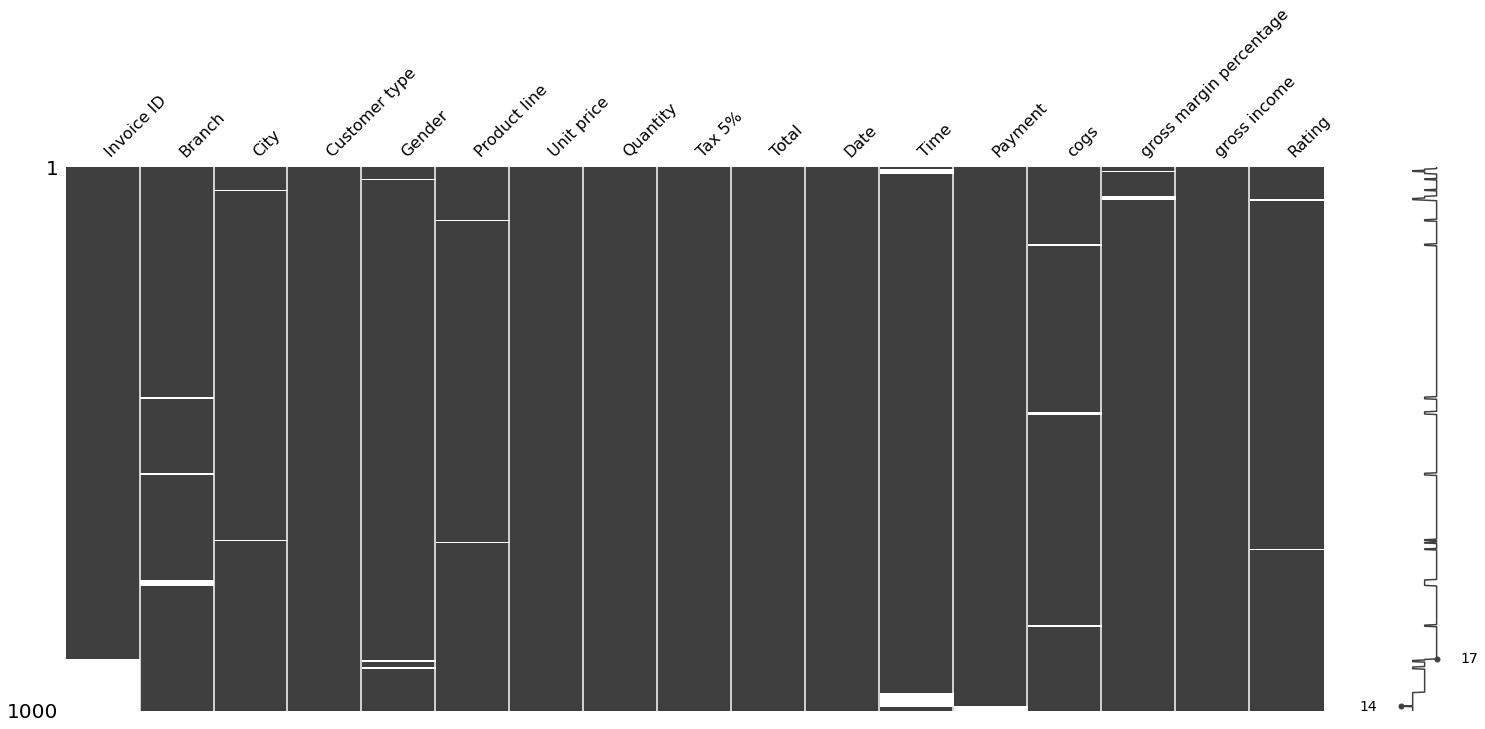

In [665]:
showing_missing_values_for_columns(df)

### Handling Missing values for payment column

In [666]:
pd.get_dummies(df['Payment'])

,123,332,444,98,Cash,Credit card,Ewallet
0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0


In [669]:
def remove_data_entry_error(df, column, value):
    df[column].replace(value, np.nan, inplace = True)
    df[column].replace(' ', np.nan, inplace = True)
    return sum(df[column] == value)


There is some data entry error in payment column firstly we wil remove that and then will impute null values with ffill method

In [670]:
remove_data_entry_error(df, 'Payment', '123')
remove_data_entry_error(df, 'Payment', '332')
remove_data_entry_error(df, 'Payment', '444')
remove_data_entry_error(df, 'Payment', '98')

0

In [671]:
df['Payment'].fillna(method= 'ffill', inplace=True)

In [672]:
arr = [856, 857, 858, 886]
df.iloc[arr]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8.0,8.448,177.408,1/1/2019,19:31,Cash,168.96,4.761904762,8.448,6.3
857,748-45-2862,A,Yangon,Member,Female,Home and lifestyle,28.31,4.0,5.662,118.902,3/7/2019,18:35,Cash,113.24,4.761904762,5.662,8.2
858,234-36-2483,B,Mandalay,Normal,Male,Health and beauty,57.59,6.0,17.277,362.817,2/15/2019,13:51,Cash,345.54,4.761904762,17.277,5.1
886,325-89-4209,A,Yangon,Member,Male,Food and beverages,87.90,1.0,4.395,92.295,2/5/2019,19:42,Cash,87.90,4.761904762,4.395,6.7


Invoice ID                 95
Branch                     19
City                        4
Customer type               0
Gender                      9
Product line                5
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                     0
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64


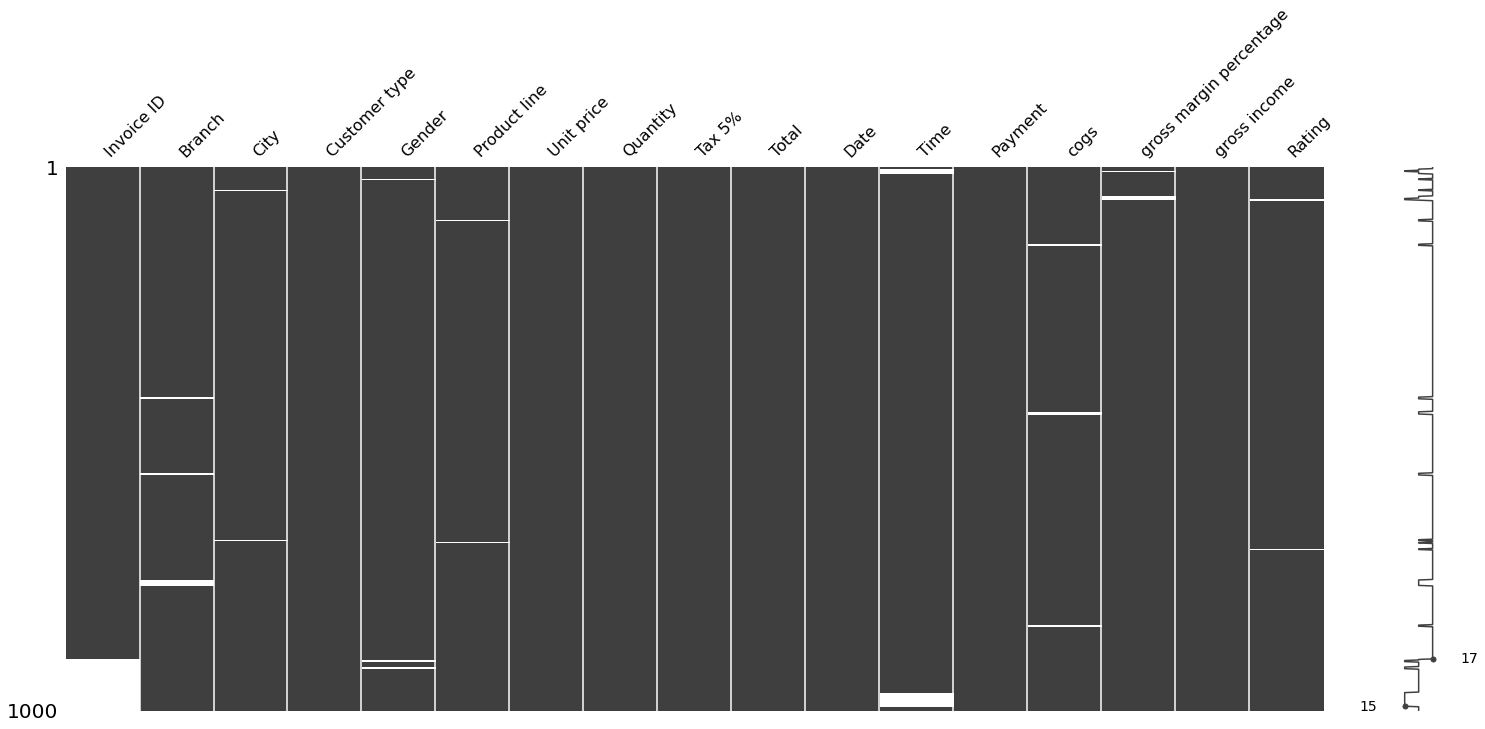

In [673]:
showing_missing_values_for_columns(df)

### Handling Missing values in Gender Column

In [677]:
df['Gender'].fillna(method= 'ffill', inplace=True)

### Handling Missing values in Product line column

In [678]:
pd.get_dummies(df['Product line'])

,Electr,Electronic a,Electronic access,Electronic accessories,Electronic accessories+F327,Fashion access,Fashion accessories,Food and bever,Food and beverages,Health and bea,Health and beauty,Home and lifest,Home and lifestyle,Sports and tr,Sports and tra,Sports and travel
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Handling data entry errors

In [679]:
df['Product line'].replace(['Electr',	'Electronic a',	'Electronic access', 'Electronic accessories+F327'], 'Electronic accessories', inplace = True)
df['Product line'].replace('Fashion access', 'Fashion accessories', inplace = True)
df['Product line'].replace('Food and bever', 'Food and beverages', inplace = True)
df['Product line'].replace('Health and bea', 'Health and beauty', inplace = True)
df['Product line'].replace('Home and lifest', 'Home and lifestyle', inplace = True)
df['Product line'].replace(['Sports and tr',	'Sports and tra'], 'Sports and travel', inplace = True)

In [680]:
df['Product line'].fillna(method= 'ffill', inplace=True)

### Handling Missing Values for City column

In [674]:
pd.get_dummies(df['City'])

,Mandalay,Naypyitaw,Naypyitawe,Naypyitawp,Naypyitay,Yangon,Yangon0,Yangono
0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,0
996,1,0,0,0,0,0,0,0
997,0,0,0,0,0,1,0,0
998,0,0,0,0,0,1,0,0


We are handling data entry errors in City column

In [675]:
df['City'].replace(['Naypyitay', 'Naypyitawe', 'Naypyitawp'], 'Naypyitaw', inplace = True)
df['City'].replace(['Yangon0',	'Yangono'], 'Yangon', inplace = True)

In [681]:
df[df['City'].isnull()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
42,354-25-5821,B,NaN,Member,Female,Sports and travel,69.12,6.0,20.736,435.456,2/8/2019,13:03,Cash,414.72,4.761904762,20.736,5.6
43,228-96-1411,C,NaN,Member,Female,Food and beverages,98.70,8.0,39.480,829.080,3/4/2019,20:39,Cash,789.60,4.761904762,39.48,7.6
685,241-96-5076,B,NaN,Member,Female,Home and lifestyle,49.10,2.0,4.910,103.110,1/8/2019,12:58,Credit card,98.20,4.761904762,4.91,6.4
686,767-97-4650,B,NaN,Member,Female,Sports and travel,64.83,2.0,6.483,136.143,1/8/2019,11:59,Credit card,129.66,4.761904762,6.483,8.0


Since we found out that there is a relationship between cities and branches so we mapped city to branches and imputed values for City column

In [682]:
df[(df['Branch'] == 'A')]['City'].mode()

0    Yangon
dtype: object

In [683]:
df[(df['Branch'] == 'B')]['City'].mode()

0    Mandalay
dtype: object

In [684]:
df[(df['Branch'] == 'C')]['City'].mode()

0    Naypyitaw
dtype: object

In [685]:
df['City'] = df['City'].mask((df['City'].isnull()) & (df['Branch'] == 'A'), 'Yangon')
df['City'] = df['City'].mask((df['City'].isnull()) & (df['Branch'] == 'B'), 'Mandalay')
df['City'] = df['City'].mask((df['City'].isnull()) & (df['Branch'] == 'C'), 'Naypyitaw')
arr = [42, 43, 685, 686]
df.iloc[arr]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
42,354-25-5821,B,Mandalay,Member,Female,Sports and travel,69.12,6.0,20.736,435.456,2/8/2019,13:03,Cash,414.72,4.761904762,20.736,5.6
43,228-96-1411,C,Naypyitaw,Member,Female,Food and beverages,98.70,8.0,39.480,829.080,3/4/2019,20:39,Cash,789.60,4.761904762,39.48,7.6
685,241-96-5076,B,Mandalay,Member,Female,Home and lifestyle,49.10,2.0,4.910,103.110,1/8/2019,12:58,Credit card,98.20,4.761904762,4.91,6.4
686,767-97-4650,B,Mandalay,Member,Female,Sports and travel,64.83,2.0,6.483,136.143,1/8/2019,11:59,Credit card,129.66,4.761904762,6.483,8.0


Invoice ID                 95
Branch                     19
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                     0
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64


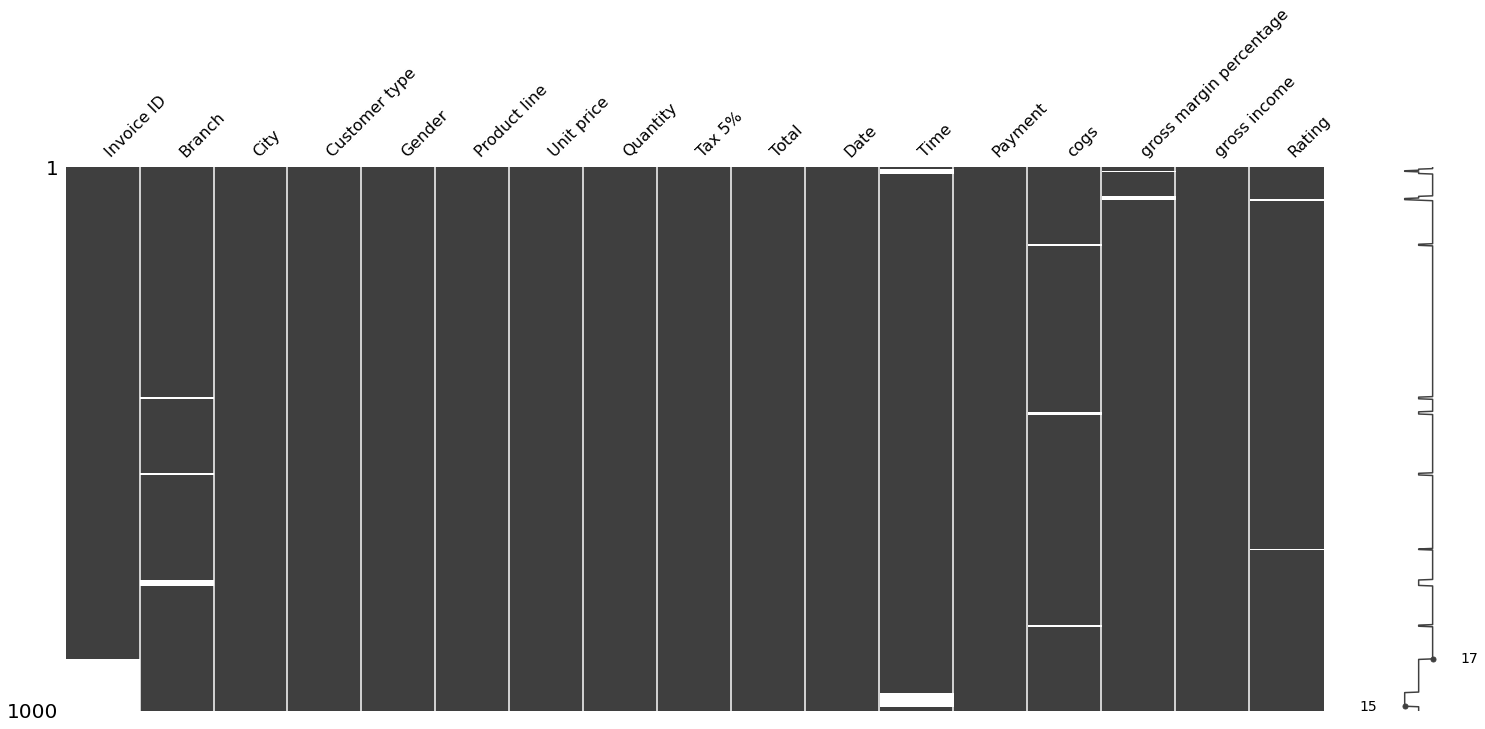

In [686]:
showing_missing_values_for_columns(df)

### Handling error in Date Column

In [687]:
# Changing Date's column data type

df['Date'] =pd.to_datetime(df['Date'], errors='coerce')

In [688]:
df['Date'].value_counts().unique()

array([20, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  1])

In [689]:
df['Quarter'] = df['Date'].apply(lambda x: x.quarter)
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Week'] = df['Date'].apply(lambda x: x.week)
df['Day'] = df['Date'].apply(lambda x: x.day)

In [690]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Quarter,Year,Month,Week,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,...,Ewallet,522.83,4.761904762,26.1415,9.1,1.0,2019.0,1.0,1.0,5.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,...,Cash,76.40,4.761904762,3.82,9.6,1.0,2019.0,3.0,10.0,8.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,...,Credit card,324.31,4.761904762,16.2155,7.4,1.0,2019.0,3.0,9.0,3.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,...,Ewallet,465.76,4.761904762,23.288,8.4,1.0,2019.0,1.0,4.0,27.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,...,Ewallet,604.17,4.761904762,30.2085,5.3,1.0,2019.0,2.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,42.3675,...,Credit card,40.35,4.761904762,2.0175,6.2,1.0,2019.0,1.0,5.0,29.0
996,NaN,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,1022.4900,...,Credit card,973.80,4.761904762,48.69,4.4,1.0,2019.0,3.0,9.0,2.0
997,NaN,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,...,Credit card,31.84,4.761904762,1.592,7.7,1.0,2019.0,2.0,6.0,9.0
998,NaN,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,...,Credit card,65.82,4.761904762,3.291,4.1,1.0,2019.0,2.0,8.0,22.0


In [692]:
from sklearn.impute import SimpleImputer

def imputing_column(df, column, strategy1):
    #Imputing with median
    mean_imputation = SimpleImputer(strategy= strategy1)
    df[[column]] = mean_imputation.fit_transform(df[[column]])
    # Ensuring that there are no more missing values
    return df.info()

In [693]:
imputing_column(df, 'Quarter', 'median')
imputing_column(df, 'Year', 'median')
imputing_column(df, 'Month', 'median')
imputing_column(df, 'Week', 'median')
imputing_column(df, 'Day', 'median')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               905 non-null    object        
 1   Branch                   981 non-null    object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   float64       
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     996 non-null    datetime64[ns]
 11  Time                     965 non-null    object        
 12  Payment                  1000 non-n

### Handling Missing values of Time column

In [694]:
df['Time'] = pd.to_datetime(df['Time'])
df['Minutes'] = df['Time'].dt.hour * 60 + df['Time'].dt.minute + df['Time'].dt.second/60
df['Minutes']

0       788.0
1       629.0
2       803.0
3      1233.0
4         NaN
        ...  
995     826.0
996    1036.0
997     802.0
998     933.0
999     808.0
Name: Minutes, Length: 1000, dtype: float64

In [695]:
imputing_column(df, 'Minutes', 'median')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               905 non-null    object        
 1   Branch                   981 non-null    object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   float64       
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     996 non-null    datetime64[ns]
 11  Time                     965 non-null    datetime64[ns]
 12  Payment                  1000 non-n

In [696]:
df['Minutes']

0       788.0
1       629.0
2       803.0
3      1233.0
4       919.0
        ...  
995     826.0
996    1036.0
997     802.0
998     933.0
999     808.0
Name: Minutes, Length: 1000, dtype: float64

### Handling Missing values for COGS column

In [697]:
cogs = df[df['cogs'].isnull()].index.tolist()
for index in cogs:
    df.loc[index,'cogs'] = (df.loc[index,'Total']-df.loc[index,'Tax 5%'])

In [698]:
df.iloc[cogs]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Quarter,Year,Month,Week,Day,Minutes
142,338-65-2210,C,Naypyitaw,Member,Female,Health and beauty,68.60,10.0,34.3000,720.3000,...,686.00,4.761904762,34.3,9.1,1.0,2019.0,2.0,6.0,5.0,1197.0
143,488-25-4221,C,Naypyitaw,Member,Female,Food and beverages,30.41,1.0,1.5205,31.9305,...,30.41,4.761904762,1.5205,8.4,1.0,2019.0,2.0,8.0,22.0,636.0
144,239-10-7476,A,Yangon,Normal,Female,Home and lifestyle,77.95,6.0,23.3850,491.0850,...,467.70,4.761904762,23.385,8.0,1.0,2019.0,1.0,4.0,21.0,997.0
450,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6.0,22.4130,470.6730,...,448.26,4.761904762,22.413,6.7,1.0,2019.0,1.0,1.0,1.0,1147.0
451,744-09-5786,B,Mandalay,Normal,Male,Electronic accessories,22.01,6.0,6.6030,138.6630,...,132.06,4.761904762,6.603,7.6,1.0,2019.0,1.0,1.0,2.0,1130.0
452,727-17-0390,A,Yangon,Normal,Female,Food and beverages,63.61,5.0,15.9025,333.9525,...,318.05,4.761904762,15.9025,4.8,1.0,2019.0,3.0,11.0,16.0,763.0
453,568-88-3448,A,Yangon,Normal,Male,Health and beauty,25.00,1.0,1.2500,26.2500,...,25.00,4.761904762,1.25,5.5,1.0,2019.0,3.0,9.0,3.0,909.0
454,187-83-5490,A,Yangon,Member,Male,Electronic accessories,20.77,4.0,4.1540,87.2340,...,83.08,4.761904762,4.154,4.7,1.0,2019.0,1.0,5.0,31.0,827.0
842,860-73-6466,A,Yangon,Member,Female,Sports and travel,39.47,2.0,3.9470,82.8870,...,78.94,4.761904762,3.947,5.0,1.0,2019.0,3.0,9.0,2.0,976.0
843,549-23-9016,C,Naypyitaw,Member,Female,Food and beverages,14.87,2.0,1.4870,31.2270,...,29.74,4.761904762,1.487,8.9,1.0,2019.0,2.0,7.0,13.0,1095.0


### Handling Missing values for gross margin percentage

In [699]:
df["gross margin percentage"] = pd.to_numeric(df["gross margin percentage"], errors='coerce')
imputing_column(df, 'gross margin percentage', 'median')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               905 non-null    object        
 1   Branch                   981 non-null    object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   float64       
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     996 non-null    datetime64[ns]
 11  Time                     965 non-null    datetime64[ns]
 12  Payment                  1000 non-n

### Handling Missing Values for Rating

In [700]:
imputing_column(df, 'Rating', 'median')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               905 non-null    object        
 1   Branch                   981 non-null    object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   float64       
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     996 non-null    datetime64[ns]
 11  Time                     965 non-null    datetime64[ns]
 12  Payment                  1000 non-n

# Dropping Columns

In [701]:
def drop_column(df, column):
    df = df.drop(column, axis=1, inplace= True)
    return df

We are dropping Invoice column because it has unique values and cannot be imputed

In [ ]:
drop_column(df, 'Invoice ID')

We are dropping Branch column because we can find the exact relation with City column since both are related

In [703]:
drop_column(df, 'Branch')

Dropping previous Date and Time columns

In [741]:
drop_column(df, 'Date')
drop_column(df, 'Time')


KeyError: ignored

Dropped Quarter and Week column

In [742]:
drop_column(df, 'Quarter')

In [747]:
drop_column(df, 'Week')

In [748]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   City      997 non-null    object        
 1   Customer  997 non-null    object        
 2   Gender    997 non-null    object        
 3   Product   997 non-null    object        
 4   Unit      997 non-null    float64       
 5   Quantity  997 non-null    float64       
 6   Tax       997 non-null    float64       
 7   Total     997 non-null    float64       
 8   Payment   997 non-null    object        
 9   cogs      997 non-null    float64       
 10  gmp       997 non-null    float64       
 11  income    997 non-null    object        
 12  Rating    997 non-null    float64       
 13  Year      997 non-null    datetime64[ns]
 14  Month     997 non-null    datetime64[ns]
 15  Day       997 non-null    datetime64[ns]
 16  Time      997 non-null    float64       
dtypes: datetime64[ns

# Outliers

## Checking Outlier for Year

In [705]:
def outliers_boxplot(df, column, value):
    plt.figure(figsize=(12, 3), dpi = 100)
    sns.boxplot(df[column])
    plt.axvline(value, ls='--')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


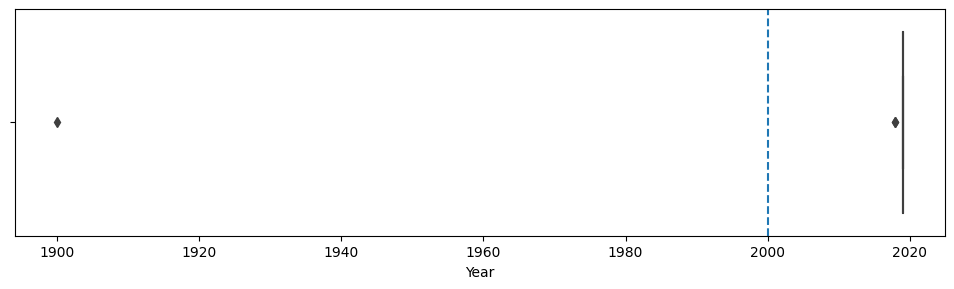

In [706]:
outliers_boxplot(df, 'Year', 2000)

In [707]:
df = df[df['Year'] > 2000]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


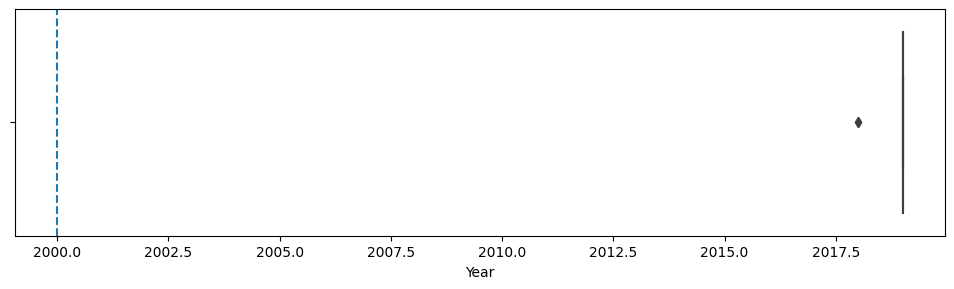

In [708]:
outliers_boxplot(df, 'Year', 2000)

## Checking Outlier for Month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


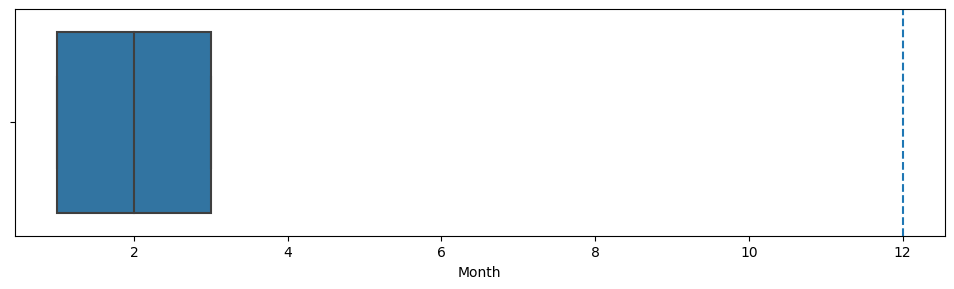

In [709]:
outliers_boxplot(df, 'Month', 12)

## Checking Outliers for Days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


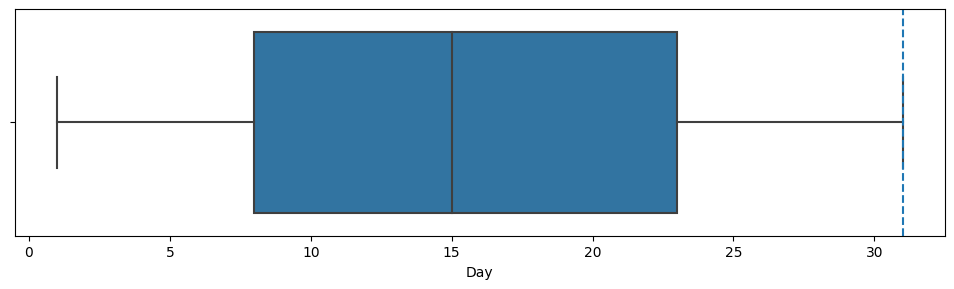

In [710]:
outliers_boxplot(df, 'Day', 31)

## Checking Outliers for Unit price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


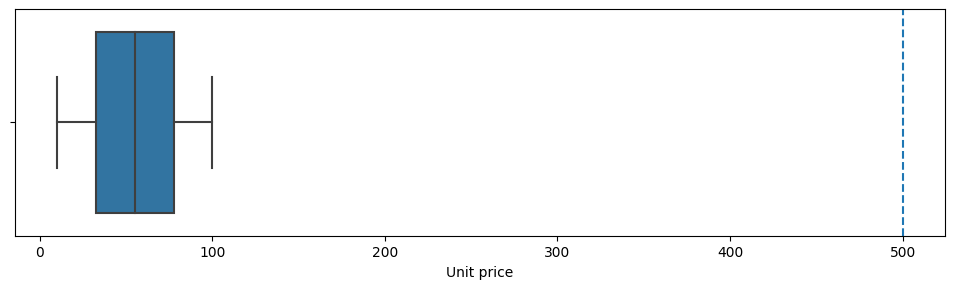

In [711]:
outliers_boxplot(df, 'Unit price', 500)

## Checking Outliers for Quantity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


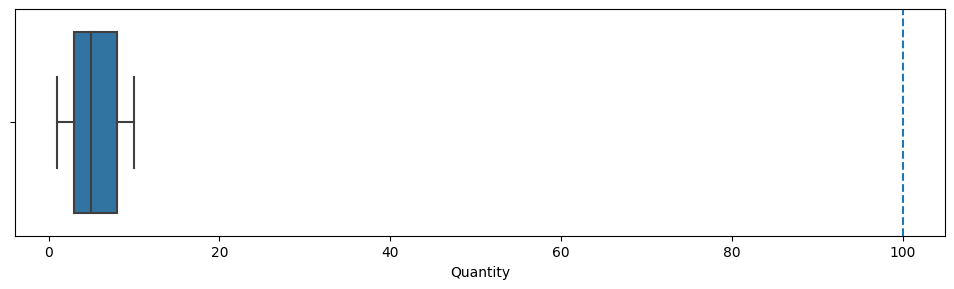

In [712]:
outliers_boxplot(df, 'Quantity', 100)

## Checking Outliers for Tax 5%

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


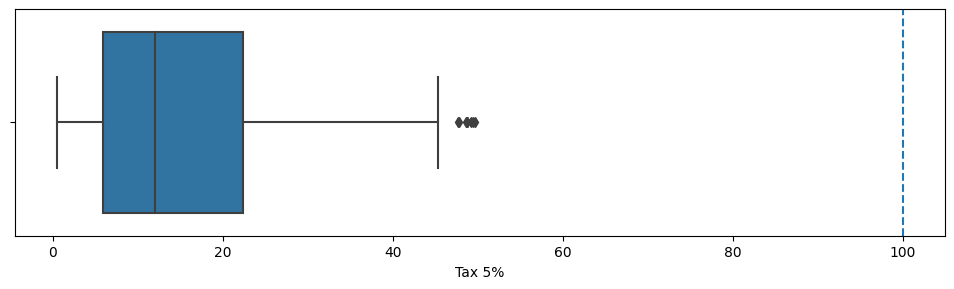

In [713]:
outliers_boxplot(df, 'Tax 5%', 100)

## Checking outliers for Total

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


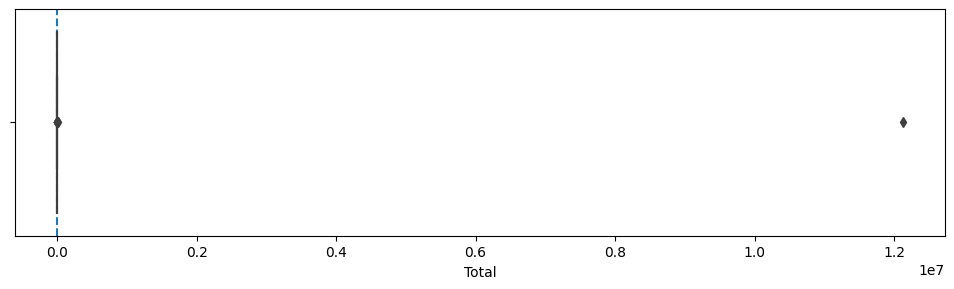

In [714]:
outliers_boxplot(df, 'Total', 1000)

In [715]:
df = df[df['Total'] < 5000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


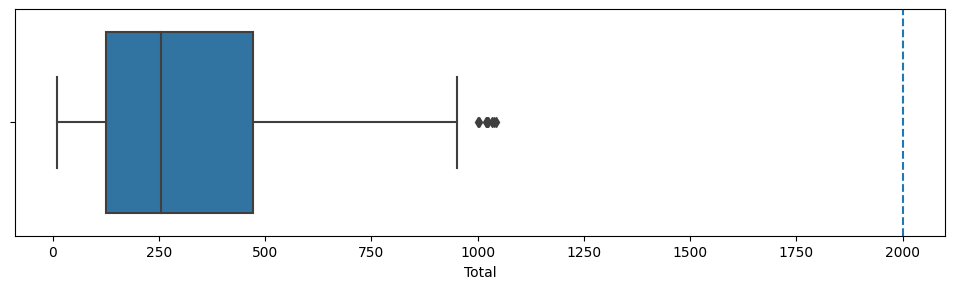

In [716]:
outliers_boxplot(df, 'Total', 2000)

# Descriptive Analysis

In [717]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,Rating,Quarter,Year,Month,Week,Day,Minutes
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.0,997.000000,997.000000,997.000000,997.000000,997.000000
mean,55.670612,5.511535,15.376488,322.906247,307.529759,4.758609,6.968405,1.0,2018.997994,1.996991,7.004012,15.196590,924.235707
std,26.523954,2.921173,11.699087,245.680823,233.981736,0.119632,1.710562,0.0,0.044766,0.832926,3.586004,8.709586,188.583974
min,10.080000,1.000000,0.508500,10.678500,10.170000,1.000000,4.000000,1.0,2018.000000,1.000000,1.000000,1.000000,600.000000
25%,32.800000,3.000000,5.955000,125.055000,119.100000,4.761905,5.500000,1.0,2019.000000,1.000000,4.000000,8.000000,765.000000
50%,55.390000,5.000000,12.096000,254.016000,241.920000,4.761905,6.950000,1.0,2019.000000,2.000000,7.000000,15.000000,919.000000
75%,77.950000,8.000000,22.430000,471.030000,448.600000,4.761905,8.400000,1.0,2019.000000,3.000000,10.000000,23.000000,1090.000000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,5.000000,10.000000,1.0,2019.000000,3.000000,13.000000,31.000000,1259.000000


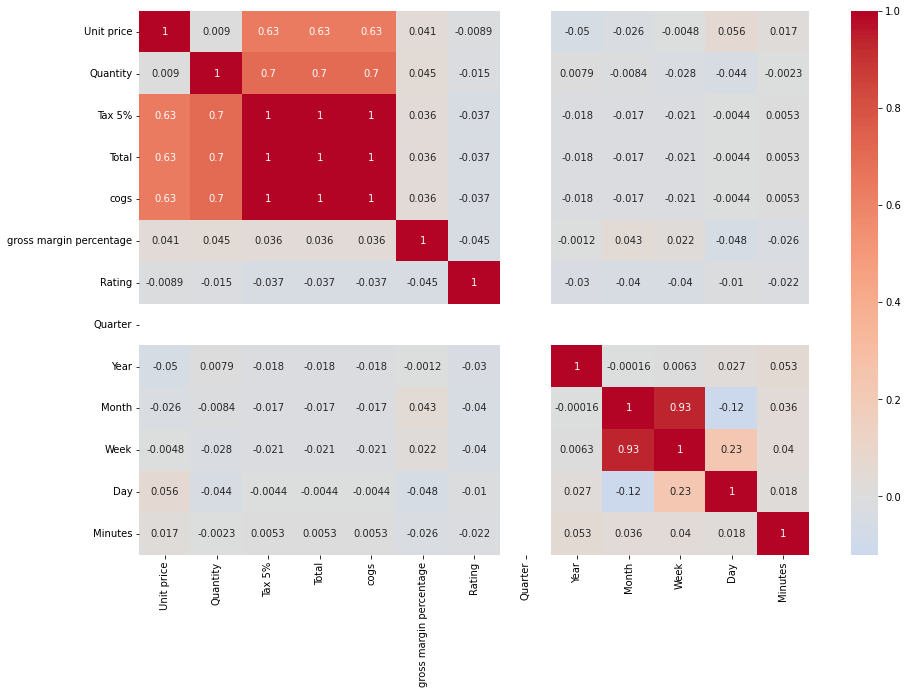

In [718]:
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center = 0)

* **Insight 1:** 
We can see that the 'Total' is highly correlated with 'Tax 5%' and 'cogs' because the 
values for Total is highly impacted by tax values and cogs.

* **Insight 2:**
We can see that the total amount for the goods bought has no relation with rating given to the respective products, 'Total' and 'Rating' are negatively correlated with each other.


# Inferential Analysis

In [719]:
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    print(num_columns)
    return num_columns
def cat_cols(df):
    types_map = df.dtypes.to_dict()
    cat_columns = []
    for k,v in types_map.items():
        if not( np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v)):
            cat_columns.append(k)

    #print(cat_columns)
    return cat_columns

In [771]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y') 
df['Month'] = pd.to_datetime(df['Month'], format='%m') 
df['Day'] = pd.to_datetime(df['Day'], format='%d') 

In [770]:
#df['Time'] =df['Time'].astype(np.str_)
#df['Time'] = df['Time'].apply(lambda x: x.zfill(4))
df["Time"] = pd.to_numeric(df.Time, errors='coerce')
df['Time'] = pd.to_datetime(df['Time'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   City      997 non-null    object        
 1   Customer  997 non-null    object        
 2   Gender    997 non-null    object        
 3   Product   997 non-null    object        
 4   Unit      997 non-null    float64       
 5   Quantity  997 non-null    float64       
 6   Tax       997 non-null    float64       
 7   Total     997 non-null    float64       
 8   Payment   997 non-null    object        
 9   cogs      997 non-null    float64       
 10  gmp       997 non-null    float64       
 11  income    997 non-null    object        
 12  Rating    997 non-null    float64       
 13  Year      997 non-null    datetime64[ns]
 14  Month     997 non-null    datetime64[ns]
 15  Day       997 non-null    datetime64[ns]
 16  Time      997 non-null    datetime64[ns]
dtypes: datetime64[ns

In [732]:
df.rename(columns={"Unit price":"Unit", 'Tax 5%': 'Tax', 'gross margin percentage': 'gmp', 'Customer type': 'Customer', 'Product line': 'Product', 'gross income': 'income', 'Minutes': 'Time'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      997 non-null    object 
 1   Customer  997 non-null    object 
 2   Gender    997 non-null    object 
 3   Product   997 non-null    object 
 4   Unit      997 non-null    float64
 5   Quantity  997 non-null    float64
 6   Tax       997 non-null    float64
 7   Total     997 non-null    float64
 8   Payment   997 non-null    object 
 9   cogs      997 non-null    float64
 10  gmp       997 non-null    float64
 11  income    997 non-null    object 
 12  Rating    997 non-null    float64
 13  Quarter   997 non-null    float64
 14  Year      997 non-null    float64
 15  Month     997 non-null    float64
 16  Week      997 non-null    float64
 17  Day       997 non-null    float64
 18  Time      997 non-null    float64
dtypes: float64(13), object(6)
memory usage: 155.8+ KB


In [772]:

numerical_cols = get_num_cols(df)
categorical_cols = cat_cols(df)

['Unit', 'Quantity', 'Tax', 'Total', 'cogs', 'gmp', 'Rating']


### T-Test

In [722]:
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    print(num_columns)
    return num_columns

def t_test(df):
    num_columns = get_num_cols(df)
    for i in range(len(num_columns)-1):
        print("\n --------"+num_columns[i]+"--------")
        for j in range(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(df[col1], df[col2])
            print("(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
            # interpret p-value
            alpha = 0.05
            #print('significance=%.3f, p=%.3f' % (alpha, p_val))
            if p_val <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')


In [723]:
t_test(df)

['Unit', 'Quantity', 'Tax', 'Total', 'cogs', 'gmp', 'Rating', 'Quarter', 'Year', 'Month', 'Week', 'Day', 'Minutes']

 --------Unit--------
(Unit,Quantity) => t-value=59.35274801418714, p-value=0.0
Dependent (reject H0)
(Unit,Tax) => t-value=43.88834153565888, p-value=6.104077489064859e-295
Dependent (reject H0)
(Unit,Total) => t-value=-34.14714109425752, p-value=1.3873658390057532e-201
Dependent (reject H0)
(Unit,cogs) => t-value=-33.771528863639176, p-value=4.5049183973642975e-198
Dependent (reject H0)
(Unit,gmp) => t-value=60.60731834620679, p-value=0.0
Dependent (reject H0)
(Unit,Rating) => t-value=57.857101896290494, p-value=0.0
Dependent (reject H0)
(Unit,Quarter) => t-value=65.0823519825488, p-value=0.0
Dependent (reject H0)
(Unit,Year) => t-value=-2337.22977413313, p-value=0.0
Dependent (reject H0)
(Unit,Month) => t-value=63.86400763078025, p-value=0.0
Dependent (reject H0)
(Unit,Week) => t-value=57.412569407515804, p-value=0.0
Dependent (reject H0)
(Unit,Day) => t-value=45.7772

### Anova Test

In [724]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):   
        num_col = num_cols[i]
        for j in range(len(cat_cols)-1):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=df).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)
            print()



In [725]:
anova_test(numerical_cols, categorical_cols, df)


ANOVA => Unit - City
                 sum_sq     df         F  PR(>F)
City         525.613065    2.0  0.373089  0.6887
Residual  700180.468062  994.0       NaN     NaN


ANOVA => Unit - Customer
                 sum_sq     df        F    PR(>F)
Customer     289.725656    1.0  0.41158  0.521317
Residual  700416.355471  995.0      NaN       NaN


ANOVA => Unit - Gender
                 sum_sq     df         F    PR(>F)
Gender        56.958865    1.0  0.080888  0.776157
Residual  700649.122262  995.0       NaN       NaN


ANOVA => Unit - Product
                 sum_sq     df         F   PR(>F)
Product     1454.973058    5.0  0.412406  0.84036
Residual  699251.108069  991.0       NaN      NaN


ANOVA => Unit - Date
                 sum_sq     df         F    PR(>F)
Date       58606.898190   91.0  0.907724  0.716131
Residual  642099.182937  905.0       NaN       NaN


ANOVA => Unit - Time
                 sum_sq     df         F    PR(>F)
Time      310539.033384  501.0  0.786381  0.996293

### Chi-squared Test

In [726]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(cat_cols, df):
    for i in range(len(cat_cols)-1):
        print("\n\t --------"+cat_cols[i]+"--------")
        for j in range(i+1,len(cat_cols)):
            cat_var1 = cat_cols[i]
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

    # interpret p-value
            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')
            print("\n")

In [727]:
chi_square_test(categorical_cols, df)


	 --------City--------
Customer   Member  Normal
City                     
Mandalay      165     166
Naypyitaw     169     158
Yangon        167     172
dof=2
[[166.32998997 164.67001003]
 [164.31995988 162.68004012]
 [170.35005015 168.64994985]]
significance=0.050, p=0.810
Independent (fail to reject H0)


Gender     Female  Male
City                   
Mandalay      157   174
Naypyitaw     175   152
Yangon        160   179
dof=2
[[163.34202608 167.65797392]
 [161.36810431 165.63189569]
 [167.28986961 171.71013039]]
significance=0.050, p=0.184
Independent (fail to reject H0)


Product    Electronic accessories  Fashion accessories  Food and beverages  \
City                                                                         
Mandalay                       55                   62                  50   
Naypyitaw                      54                   65                  67   
Yangon                         60                   51                  56   

Product    Health and b

### Tukey Test

In [728]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


def tukeyhsd_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):
        num_var = num_cols[i]
        print("\t-------------"+num_var+"-------------")
        for j in range(len(cat_cols)-1):
            cat_var = cat_cols[j]
            tukey = pairwise_tukeyhsd(endog=df[num_var], groups=df[cat_var], alpha=0.05)
            #display results
            
            print(cat_var)
            print(tukey)
            print()

In [ ]:
tukeyhsd_test(numerical_cols, categorical_cols, df)